# Seattle Airbnb CRISP-DM Project
## Airbnb Dataset - Seattle, WA
### Sajid Al Sanai
08/07/2022

---

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [124]:
dl = pd.read_csv('./listings.csv')
dr = pd.read_csv('./reviews.csv')
dc = pd.read_csv('./calendar.csv')

---

### CRISP-DM
The **CRISP-DM Process** involves the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

___

### 1. Business Understanding

On a preliminary review of the data schema, I am interested in finding some answers to the following questions:
1. What are the highest rated areas to to reserve accomodations in Seattle?
2. What are the highest revenue generating neighbourhoods in Seattle?
3. Which scores are most important to overall ratings? (Linear Regression)
4. Do hosts with higher ratings overall earn higher revenue? (Linear Regression)
5. What are the most widely provided amenities listed by hosts in Seattle?
6. Which amenities, housing characteristics, and factors contribute positively to revenue? (Linear Regression)
7. Which amenities, housing characteristics, and factors contribute positively to ratings? (Linear Regression)

___

### 2. Data Understanding

Airbnb data provided is for the city of Seattle, WA during the period of 2016-2017:

1. **Listings.csv** contains details of properties and pricing
2. **Reviews.csv** contains reviews after home-stays
3. **Calendar.csv** contains pricing for listings on specific days

**Investigating Features and Data Type**

In [125]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

There are 92 features of mixed type. Certain features do not adhere to the anticipated data type and will require cleaning and preparation.

In [126]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


There are 6 features of mixed type. Features appear to adhere to their anticipated data types, but some transformation may be required for string data.

In [127]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


There are 4 features of mixed type. Certain features like price do not adhere to the anticipated data type and will require cleaning and preparation.

In [128]:
dl.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


The following are summary statistics of numeric features in listings.

In [129]:
pd.set_option('display.max_rows', None)
dl.describe().T
pd.set_option('display.max_rows', 10)

We investigate a list of features which are of an unanticipated data type or are ambiguous in content in *Listings* in order to gain a full understanding:

In [130]:
investigate_features = [
'host_response_time',
'host_response_rate',
'host_acceptance_rate',
'host_is_superhost',
'host_verifications',
'host_has_profile_pic',
'host_identity_verified',
'neighbourhood_cleansed',
'neighbourhood_group_cleansed',
'zipcode',
'market',
'smart_location',
'is_location_exact',
'price',
'weekly_price',
'monthly_price',
'security_deposit',
'cleaning_fee',
'extra_people',
'calendar_updated',
'has_availability',
'calendar_last_scraped',
'requires_license',
'license',
'instant_bookable',
'cancellation_policy',
'require_guest_profile_picture',
'require_guest_phone_verification'
]

In [131]:
for feature in investigate_features:
    print('{}:'.format(feature))
    print(dl[feature].unique()[:10])
    print('')

host_response_time:
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']

host_response_rate:
['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%']

host_acceptance_rate:
['100%' nan '0%']

host_is_superhost:
['f' 't' nan]

host_verifications:
["['email', 'phone', 'reviews', 'kba']"
 "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']"
 "['email', 'phone', 'google', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'reviews', 'kba']"
 "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'kba']"
 "['email', 'phone', 'linkedin', 'reviews', 'jumio']"
 "['email', 'reviews', 'kba']"
 "['email', 'phone', 'linkedin', 'reviews', 'kba']"]

host_has_profile_pic:
['t' 'f' nan]

host_identity_verified:
['t' 'f' nan]

neighbourhood_cleansed:
['West Queen Anne' 'Adams' 'West Woodland' 'East Queen Anne' 'Wallingford'
 'N

**Features which are non-numeric but should be numeric include:**
1. 'price'
2. 'weekly_price'
3. 'monthly_price'
4. 'security_deposit'
5. 'cleaning_fee'
6. 'extra_people'
7. 'host_response_rate'
8. 'host_acceptance_rate'
9. 'zipcode' *(keep as non-numeric categorical)*

These all represent dollar amounts or percentages and have been formatted as strings with '$', ',', and '%' punctuation. Zipcode specifically contains errata through addition of escape characters and should be a regular integer.

**Features which are non-numeric and are categorical booleans include:**
1. 'host_has_profile_pic'
2. 'host_identity_verified'
3. 'is_location_exact'
4. 'has_availability'
5. 'requires_license'
6. 'instant_bookable'
7. 'require_guest_profile_picture'
8. 'require_guest_phone_verification'

These represent true or false boolean categorical data. These require one-hot encoding.

**Features which are non-numeric and are categorical and may exhibit ordinality include:**
1. 'host_response_time
2. 'host_is_superhost'
3. 'calendar_updated'
4. 'cancellation_policy'

**Features which are already pre-cleaned and non-numeric categorical:**
1. 'neighbourhood_cleansed'
2. 'neighbourhood_group_cleansed'

In [132]:
dr.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Data in Reviews is orthodox without need for conversion.

In [133]:
dc.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


**Investigating Missing Values**

In [134]:
def find_missing(data):
    '''
    INPUT:
    data - DataFrame containing values.
    OUTPUT:
    DataFrame - DataFrame containing missing values count & percentage by feature, only if missing
    '''
    missing_pc = [sum(data[x].isna() == True) / data.shape[0] for x in data.columns]
    missing = [sum(data[x].isna() == True) for x in data.columns]
    out = pd.DataFrame([data.columns, missing, missing_pc]).T
    out.columns = ['Feature', 'Missing', 'Missing %']
    out = out[out['Missing'] > 0]
    return out

In [135]:
missing = find_missing(data=dl)
display('Listings - % Missing')
pd.set_option('display.max_rows', None)
display(missing)
pd.set_option('display.max_rows', 10)

'Listings - % Missing'

,Feature,Missing,Missing %
5,summary,177,0.046359
6,space,569,0.149031
9,neighborhood_overview,1032,0.270299
10,notes,1606,0.420639
11,transit,934,0.244631
12,thumbnail_url,320,0.083814
13,medium_url,320,0.083814
15,xl_picture_url,320,0.083814
18,host_name,2,0.000524
19,host_since,2,0.000524


In [136]:
missing = find_missing(data=dr)
display('Reviews - % Missing')
display(missing)

'Reviews - % Missing'

,Feature,Missing,Missing %
5,comments,18,0.000212


In [137]:
missing = find_missing(data=dc)
display('Calendar - % Missing')
display(missing)

'Calendar - % Missing'

,Feature,Missing,Missing %
3,price,459028,0.32939


With regards to the aforementioned questions I seek to investigate detailed in the prior section, I feel the features of specific interest for me would be as follows:
- Listings
    1. listing_id
    2. host_response_rate
    3. host_acceptance_rate
    4. host_is_superhost
    5. host_total_listings_count
    6. host_identity_verified
    7. neighbourhood_cleansed
    8. neighbourhood_group_cleansed
    9. latitude
    10. longitude
    11.  property_type
    12.  room_type
    13.  accommodates
    14.  bathrooms
    15.  bedrooms
    16.  beds
    17.  amenities
    18.  price
    19.  security_deposit
    20.  cleaning_fee
    21.  extra_people
    22.  minimum_nights
    23.  number_of_reviews
    24.  review_scores_rating
    25.  review_scores_accuracy
    26.  review_scores_cleanliness
    27.  review_scores_checkin
    28.  review_scores_communication
    29.  review_scores_location
    30.  review_scores_value
    31.  instant_bookable
    32.  cancellation_policy
    33.  reviews_per_month
- Reviews
    1. listing_id
    2. id
- Calendar
    1. n/a

___

### 3. Data Preparation

For those variables of interest which require adjustments and imputation of missing values, I group them by their data type and perform operations to prepare before modelling.

In [138]:
data = dl.copy()

In [139]:
data.rename(columns={'id': 'listing_id'}, inplace=True)

**Numeric Features**

I convert string types to percentages in the interval [0, 1].

In [140]:
data['host_response_rate'] = data['host_response_rate'].str.replace('[% ]', '').astype(float)
data['host_response_rate'] = data['host_response_rate'] * .01

/tmp/ipykernel_6390/3376617353.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['host_response_rate'] = data['host_response_rate'].str.replace('[% ]', '').astype(float)


In [141]:
data['host_acceptance_rate'].unique()

array(['100%', nan, '0%'], dtype=object)

In [142]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('[% ]', '').astype(float)
data['host_acceptance_rate'] = data['host_acceptance_rate'] * .01

/tmp/ipykernel_6390/813147728.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('[% ]', '').astype(float)


I convert categorical booleans into binary dummies.

In [143]:
data['host_is_superhost'].replace('t', 1, inplace=True)
data['host_is_superhost'].replace('f', 0, inplace=True)
sum(data['host_is_superhost'].isna()==True)

2

In [144]:
data['host_identity_verified'].replace('t', 1, inplace=True)
data['host_identity_verified'].replace('f', 0, inplace=True)
sum(data['host_identity_verified'].isna()==True)

2

I remove *'$', ','* punctuation from monetary variables and preserve them as floats.

In [145]:
data['price'] = data['price'].str.replace('[$, ]', '').astype(float)
data['security_deposit'] = data['security_deposit'].str.replace('[$, ]', '').astype(float)
data['cleaning_fee'] = data['cleaning_fee'].str.replace('[$, ]', '').astype(float)
data['extra_people'] = data['extra_people'].str.replace('[$, ]', '').astype(float)

/tmp/ipykernel_6390/2254270009.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price'] = data['price'].str.replace('[$, ]', '').astype(float)
/tmp/ipykernel_6390/2254270009.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['security_deposit'] = data['security_deposit'].str.replace('[$, ]', '').astype(float)
/tmp/ipykernel_6390/2254270009.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaning_fee'] = data['cleaning_fee'].str.replace('[$, ]', '').astype(float)
/tmp/ipykernel_6390/2254270009.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['extra_people'] = data['extra_people'].str.replace('[$, ]', '').astype(float)


In [146]:
data['instant_bookable'].replace('t', 1, inplace=True)
data['instant_bookable'].replace('f', 0, inplace=True)
sum(data['instant_bookable'].isna()==True)

0

**Categorical Features**

I investigate if categorical features have any missing values.

In [147]:
data['neighbourhood_cleansed'].unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [148]:
data['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [149]:
data['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [150]:
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [151]:
data['cancellation_policy'].unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

**Imputing Missing Values**

For missing values, I use neighbourhood which shows granular areas for where properties of similar composition may be located. I use median values for features grouped by these smaller neighbourhoods to impute what missing values should be.

For binary dummies and integer values that are missing, I impute the values as 0 under the assumption that it is likelier Airbnb app users avoid filling in information when it is irrelevant to them. Where Airbnb generated data is missing, then I assume no data for the feature exists.

In [152]:
data['host_response_rate'] = data['host_response_rate'].fillna(data.groupby('neighbourhood_cleansed')['host_response_rate'].transform('median'))

In [153]:
data['host_acceptance_rate'].fillna(0, inplace=True)

In [154]:
for listing in data[data['host_total_listings_count'].isna() == True]['listing_id']:
    display('[{}] has {} listing.'.format(listing, data[data['listing_id'] == listing].shape[0]))

'[8354452] has 1 listing.'

'[10235014] has 1 listing.'

In [155]:
data['host_total_listings_count'].fillna(1, inplace=True)

In [156]:
data['host_total_listings_count'].unique()

array([  3.,   6.,   2.,   1.,   5.,   9.,   4.,  36., 354.,   8.,  37.,
         7.,  34.,  10.,  13.,  21.,  11., 169.,  48., 502.,  12.,  18.,
        19.,  15.,  84., 163.,  17.])

In [157]:
data['host_is_superhost'].fillna(0, inplace=True)

In [158]:
data['host_identity_verified'].fillna(0, inplace=True)

In [159]:
data[data['property_type'].isna()==True]['description'].iloc[0]
data['property_type'].fillna('Apartment', inplace=True)

The values for number of beds should be the lower bound for number of bedrooms, which is straightforward. The value for number of bedrooms should be the upper bound for number of beds, however, I use the median in these cases. The value for number of bathrooms I set to the lower bound of 1.

In [160]:
display(data[data['bathrooms'].isna()==True][['bedrooms', 'bathrooms']])
data['bathrooms'].fillna(1, inplace=True)

,bedrooms,bathrooms
1242,1.0,NaN
1314,1.0,NaN
1357,2.0,NaN
1378,1.0,NaN
1961,1.0,NaN
...,...,...
2437,1.0,NaN
2698,1.0,NaN
2717,1.0,NaN
2953,1.0,NaN


In [161]:
display(data[data['bedrooms'].isna()==True][['bedrooms', 'bathrooms', 'beds']])
data['bedrooms'].fillna(data.groupby('beds')['beds'].transform('median'), inplace=True)

,bedrooms,bathrooms,beds
1429,NaN,1.0,1.0
1492,NaN,1.0,1.0
1493,NaN,1.0,2.0
1853,NaN,1.0,1.0
2619,NaN,1.0,1.0
2915,NaN,1.0,1.0


In [162]:
display(data[data['beds'].isna()==True][['bedrooms', 'bathrooms', 'beds']])
data['beds'].fillna(1, inplace=True)

,bedrooms,bathrooms,beds
1961,1.0,1.0,NaN


In [163]:
display(data['minimum_nights'].unique())
data['minimum_nights'] = data['minimum_nights'].replace(1000, data['minimum_nights'].median())

array([   1,    2,    4,    3,    5,   14,   30,   21,   20,    7,    6,
         26,   15,   12,   10,   13,   31,    8, 1000,   28,   11,   29])

I set missing review scores to the median for the neighbourhood.

In [164]:
data['review_scores_rating'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_rating'].transform('median'), inplace=True)
data['review_scores_accuracy'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_accuracy'].transform('median'), inplace=True)
data['review_scores_cleanliness'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_cleanliness'].transform('median'), inplace=True)
data['review_scores_checkin'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_checkin'].transform('median'), inplace=True)
data['review_scores_communication'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_communication'].transform('median'), inplace=True)
data['review_scores_location'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_location'].transform('median'), inplace=True)
data['review_scores_value'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_value'].transform('median'), inplace=True)

I assume the following data is missing because it is irrelevant to the host and therefore not entered (charged to guests), or Airbnb does not have any information because intuitively there are no reviews.

In [165]:
data['reviews_per_month'].fillna(0, inplace=True)

In [166]:
data['security_deposit'].fillna(0, inplace=True)
data['cleaning_fee'].fillna(0, inplace=True)
data['extra_people'].fillna(0, inplace=True)

**Feature Engineering**

I generate a new feature which is an estimate of revenue and is calculated as the product of prices for listings and the minimum number of nights hosts expect guests to reserve a booking for. This is not an accurate measure but the closer measure that is possible to be generated as a proxy for estimated revenue for a host.

In [167]:
reservations = pd.merge(dr, data, on='listing_id')

In [168]:
reservations['revenue'] = reservations['price'] * reservations['minimum_nights']
revenue = reservations[['listing_id', 'revenue']].groupby(['listing_id']).sum()

In [169]:
data = pd.merge(data, revenue, on='listing_id', how='left')
data['revenue'].fillna(0, inplace=True)

I generate binary dummies for amenities saved as JSON objects per listing after likening the different amenities as unique categorical features.

In [170]:
amenities = []
for amenity in data['amenities'].unique():
    amenities.extend(amenity.strip('{}').split(','))
amenities = pd.DataFrame(amenities)
amenities = pd.DataFrame(amenities[0].unique(), columns=['amenity'])
for i in range(len(amenities['amenity'])):
    for j in ['"']:
        amenities['amenity'].iloc[i] = re.sub(j, '', amenities['amenity'].iloc[i])
amenities.drop(amenities.index[36], inplace=True)

In [171]:
amenity_types = amenities['amenity'].unique()
amenity = pd.DataFrame(data[['listing_id', 'amenities']])
for i in range(len(amenity_types)):
    for j in ['"', ' ', '/', '-', '\(', '\)']:
        amenity_types[i] = re.sub(j, '', amenity_types[i])
    amenity['amenity_{}'.format(amenity_types[i])] = 0

In [172]:
for i in range(amenity.shape[0]):
    comparison = amenity['amenities'].iloc[i]
    comparison = comparison.strip('{}')
    for j in ['"', ' ', '/', '-', '\(', '\)']:
        comparison = re.sub(j, '', comparison)
    comparison = comparison.split(',')
    for idx in amenity_types:
        if idx in comparison:
            amenity['amenity_{}'.format(idx)].iloc[i] = 1

/tmp/ipykernel_6390/934582068.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenity['amenity_{}'.format(idx)].iloc[i] = 1


In [173]:
amenity.head()

,listing_id,amenities,amenity_TV,amenity_CableTV,amenity_Internet,amenity_WirelessInternet,amenity_AirConditioning,amenity_Kitchen,amenity_Heating,amenity_FamilyKidFriendly,...,amenity_SuitableforEvents,amenity_ElevatorinBuilding,amenity_LockonBedroomDoor,amenity_WheelchairAccessible,amenity_Gym,amenity_Pool,amenity_SmokingAllowed,amenity_Otherpets,amenity_Doorman,amenity_WasherDryer
0,241032,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,953595,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3308979,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,7421966,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,278830,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [174]:
amenity.drop('amenities', axis=1, inplace=True)

In [175]:
data = pd.merge(data, amenity, on='listing_id')

**Feature Encoding**

I generate One-Hot Encoded binary dummies for categorical features with more than (2) possible unique values.

In [176]:
from sklearn.preprocessing import OneHotEncoder

In [177]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [178]:
ohe_neighbourhood_group_cleansed = pd.DataFrame(one_hot_encoder.fit_transform(data['neighbourhood_group_cleansed'].to_numpy().reshape(-1, 1)), columns=one_hot_encoder.get_feature_names())
ohe_neighbourhood_group_cleansed.columns = [x.replace('x0', 'nbdg') for x in ohe_neighbourhood_group_cleansed.columns]
ohe_neighbourhood_group_cleansed['listing_id'] = data['listing_id']

/home/sajidsarker/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [179]:
ohe_property_type = pd.DataFrame(one_hot_encoder.fit_transform(data['property_type'].to_numpy().reshape(-1, 1)), columns=one_hot_encoder.get_feature_names())
ohe_property_type.columns = [x.replace('x0', 'property') for x in ohe_property_type.columns]
ohe_property_type['listing_id'] = data['listing_id']

/home/sajidsarker/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [180]:
ohe_room_type = pd.DataFrame(one_hot_encoder.fit_transform(data['room_type'].to_numpy().reshape(-1, 1)), columns=one_hot_encoder.get_feature_names())
ohe_room_type.columns = [x.replace('x0', 'room') for x in ohe_room_type.columns]
ohe_room_type['listing_id'] = data['listing_id']

/home/sajidsarker/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [181]:
ohe_cancellation_policy = pd.DataFrame(one_hot_encoder.fit_transform(data['cancellation_policy'].to_numpy().reshape(-1, 1)), columns=one_hot_encoder.get_feature_names())
ohe_cancellation_policy.columns = [x.replace('x0', 'cancel') for x in ohe_cancellation_policy.columns]
ohe_cancellation_policy['listing_id'] = data['listing_id']

/home/sajidsarker/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Feature Scaling**

I scale numeric features as they have a general left or right skew (especially ratings and revenue) to resemble roughly a standard normal random variable which is then transformed to lie on the interval [0, 1].

In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [183]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [184]:
data['beds'] = standard_scaler.fit_transform(data['beds'].to_numpy().reshape(-1, 1))
data['bedrooms'] = standard_scaler.fit_transform(data['bedrooms'].to_numpy().reshape(-1, 1))
data['bathrooms'] = standard_scaler.fit_transform(data['bathrooms'].to_numpy().reshape(-1, 1))
data['accommodates'] = standard_scaler.fit_transform(data['accommodates'].to_numpy().reshape(-1, 1))
data['host_total_listings_count'] = standard_scaler.fit_transform(data['host_total_listings_count'].to_numpy().reshape(-1, 1))
data['review_scores_accuracy'] = standard_scaler.fit_transform(data['review_scores_accuracy'].to_numpy().reshape(-1, 1))
data['review_scores_cleanliness'] = standard_scaler.fit_transform(data['review_scores_cleanliness'].to_numpy().reshape(-1, 1))
data['review_scores_checkin'] = standard_scaler.fit_transform(data['review_scores_checkin'].to_numpy().reshape(-1, 1))
data['review_scores_communication'] = standard_scaler.fit_transform(data['review_scores_communication'].to_numpy().reshape(-1, 1))
data['review_scores_location'] = standard_scaler.fit_transform(data['review_scores_location'].to_numpy().reshape(-1, 1))
data['review_scores_value'] = standard_scaler.fit_transform(data['review_scores_value'].to_numpy().reshape(-1, 1))
#data['number_of_reviews'] = standard_scaler.fit_transform(data['number_of_reviews'].to_numpy().reshape(-1, 1))
data['reviews_per_month'] = standard_scaler.fit_transform(data['reviews_per_month'].to_numpy().reshape(-1, 1))

In [185]:
data['beds'] = min_max_scaler.fit_transform(data['beds'].to_numpy().reshape(-1, 1))
data['bedrooms'] = min_max_scaler.fit_transform(data['bedrooms'].to_numpy().reshape(-1, 1))
data['bathrooms'] = min_max_scaler.fit_transform(data['bathrooms'].to_numpy().reshape(-1, 1))
data['accommodates'] = min_max_scaler.fit_transform(data['accommodates'].to_numpy().reshape(-1, 1))
data['host_total_listings_count'] = min_max_scaler.fit_transform(data['host_total_listings_count'].to_numpy().reshape(-1, 1))
data['review_scores_accuracy'] = min_max_scaler.fit_transform(data['review_scores_accuracy'].to_numpy().reshape(-1, 1))
data['review_scores_cleanliness'] = min_max_scaler.fit_transform(data['review_scores_cleanliness'].to_numpy().reshape(-1, 1))
data['review_scores_checkin'] = min_max_scaler.fit_transform(data['review_scores_checkin'].to_numpy().reshape(-1, 1))
data['review_scores_communication'] = min_max_scaler.fit_transform(data['review_scores_communication'].to_numpy().reshape(-1, 1))
data['review_scores_location'] = min_max_scaler.fit_transform(data['review_scores_location'].to_numpy().reshape(-1, 1))
data['review_scores_value'] = min_max_scaler.fit_transform(data['review_scores_value'].to_numpy().reshape(-1, 1))
#data['number_of_reviews'] = min_max_scaler.fit_transform(data['number_of_reviews'].to_numpy().reshape(-1, 1))
data['reviews_per_month'] = min_max_scaler.fit_transform(data['reviews_per_month'].to_numpy().reshape(-1, 1))

**Constructing Features Dataset**

In [186]:
# One Hot Encoded Features
encoded_features = amenities.columns[1:].to_list()
encoded_features.extend(amenity.columns[1:].to_list())
encoded_features.extend(ohe_neighbourhood_group_cleansed.columns)
encoded_features.extend(ohe_property_type.columns)
encoded_features.extend(ohe_room_type.columns)
encoded_features.extend(ohe_cancellation_policy.columns)
for i in range(4):
    encoded_features.remove('listing_id')

In [187]:
# Standard Scaled Features
scaled_features = ['host_response_rate',
'host_acceptance_rate',
'host_total_listings_count',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'reviews_per_month'
]

In [188]:
# Numeric Features
numeric_features = ['latitude',
'longitude',
'price',
'security_deposit',
'cleaning_fee',
'extra_people',
'number_of_reviews'
]

In [189]:
# Categorical Binary Dummies
categorical_features = ['host_is_superhost',
'host_identity_verified',
'instant_bookable'
]

In [190]:
# Constructing the Features Dataset
X = pd.DataFrame(data['listing_id'])
X = pd.merge(X, amenity, on='listing_id')
X = pd.merge(X, ohe_neighbourhood_group_cleansed, on='listing_id')
X = pd.merge(X, ohe_property_type, on='listing_id')
X = pd.merge(X, ohe_room_type, on='listing_id')
X = pd.merge(X, ohe_cancellation_policy, on='listing_id')
X[scaled_features] = data[scaled_features]
X[numeric_features] = data[numeric_features]
X[categorical_features] = data[categorical_features]

**Reviewing Prepared Dataset**

In [191]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 105 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    listing_id                       int64  
 1    amenity_TV                       int64  
 2    amenity_CableTV                  int64  
 3    amenity_Internet                 int64  
 4    amenity_WirelessInternet         int64  
 5    amenity_AirConditioning          int64  
 6    amenity_Kitchen                  int64  
 7    amenity_Heating                  int64  
 8    amenity_FamilyKidFriendly        int64  
 9    amenity_Washer                   int64  
 10   amenity_Dryer                    int64  
 11   amenity_FreeParkingonPremises    int64  
 12   amenity_BuzzerWirelessIntercom   int64  
 13   amenity_SmokeDetector            int64  
 14   amenity_CarbonMonoxideDetector   int64  
 15   amenity_FirstAidKit              int64  
 16   amenity_SafetyCard               int64  

In [192]:
pd.set_option('display.max_rows', None)
display(X.describe().T)
pd.set_option('display.max_rows', 10)

,count,mean,std,min,25%,50%,75%,max
listing_id,3818.0,5.550111e+06,2.962660e+06,3335.000000,3.258256e+06,6.118244e+06,8.035127e+06,1.034016e+07
amenity_TV,3818.0,6.741750e-01,4.687437e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
amenity_CableTV,3818.0,3.787323e-01,4.851348e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
amenity_Internet,3818.0,7.362493e-01,4.407234e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
amenity_WirelessInternet,3818.0,9.604505e-01,1.949238e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
amenity_AirConditioning,3818.0,1.773180e-01,3.819876e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
amenity_Kitchen,3818.0,8.965427e-01,3.045951e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
amenity_Heating,3818.0,9.499738e-01,2.180276e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
amenity_FamilyKidFriendly,3818.0,5.141435e-01,4.998654e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
amenity_Washer,3818.0,7.836564e-01,4.118052e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


___

### 4. Modelling

**Exploratory Analysis**

<AxesSubplot:>

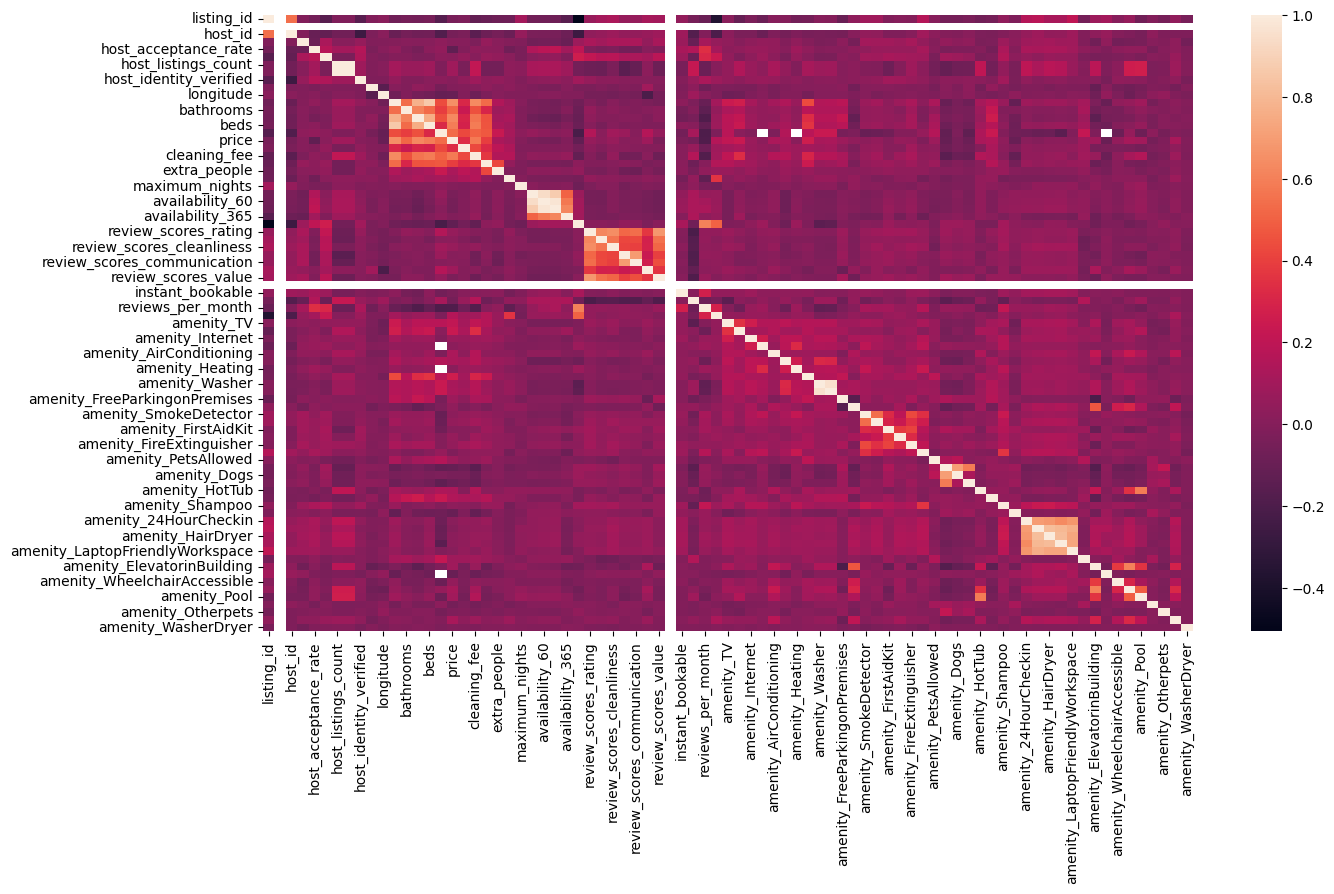

In [193]:
sns.heatmap(data.corr())

There appear to be distinct clumps of features exhibiting higher degrees of correlation. Amenities which are common tend to be present due to potential legal require,emt or as a standard, therefore exhibiting positive correlation. Additionally, certain luxurious amenities are correlated with higher priced listings.

Property configuration (beds, bathrooms) are nearly perfectly related as they are somewhat dependent on each other or can be imputed due to standard industrial configuration in the housing market (e.g. 2bed1br). Pricing structures exhibit stronger correlation as high priced listings are correlated with higher maintenance charges.

In [194]:
def chart_numeric_feature(dataset, feature):
    fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12, 8))

    sns.boxplot(data=dataset, x=feature, ax=ax[0])
    ax[0].set_title(f'{feature} Distribution Boxplot')

    sns.histplot(data=dataset, x=feature, kde=True, ax=ax[1])
    ax[1].set_title(f'{feature} Distribution Histogram')

    plt.show()

In [195]:
def chart_numeric_feature_by_target(dataset, target):
    fig, ax = plt.subplots(4, 2, figsize=(20, 50))
    ax = ax.flatten()

    for counter, feature in enumerate(dataset):
        if counter < len(dataset):
            sns.histplot(data=dataset, x=feature, kde=True, hue=target, ax=ax[counter])
            ax[counter].set_title('{} Histogram: {}'.format(feature, target))
        else:
            sns.countplot(data=dataset, x=feature, hue=target, ax=ax[counter])
            ax[counter].set_title('{} Bar Chart: {}'.format(feature, target))

    plt.show()

In [196]:
def chart_categorical_feature(dataset, feature):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    data_ = dataset[dataset[feature].isnull() == False]
    data_ = data_[feature]

    # Bar Chart
    ax[0].bar(x=data_.unique(), height=data_.value_counts())
    ax[0].set_title(f'{feature} Bar Chart')

    # Pie Chart
    data_.value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1])
    ax[1].set_title(f'{feature} Pie Chart')
    
    plt.show()

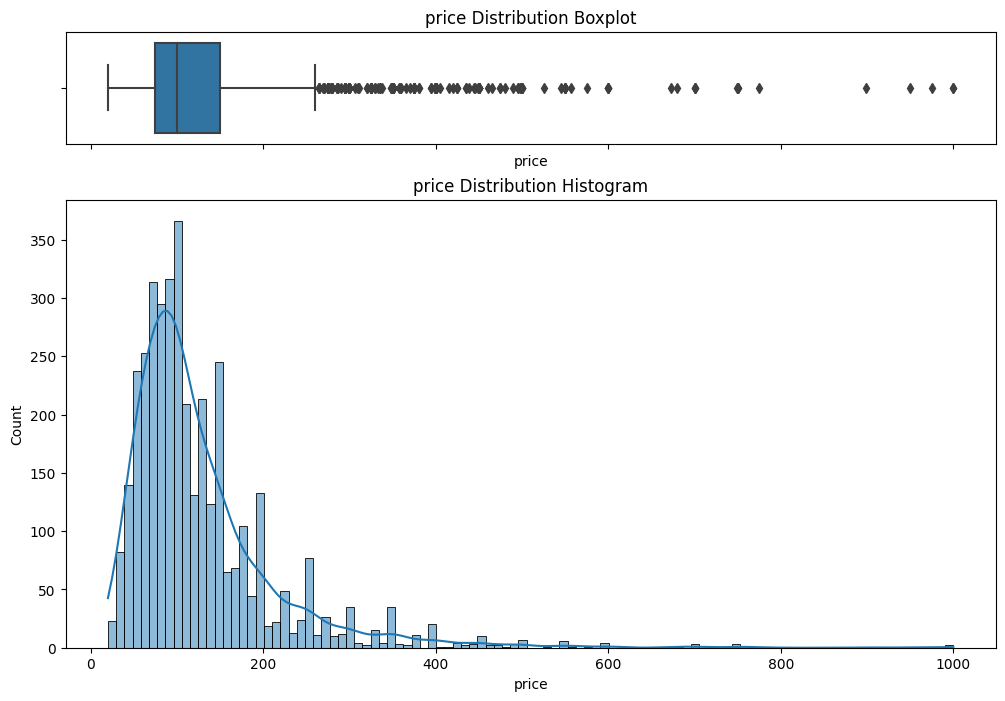

In [197]:
chart_numeric_feature(data, 'price')

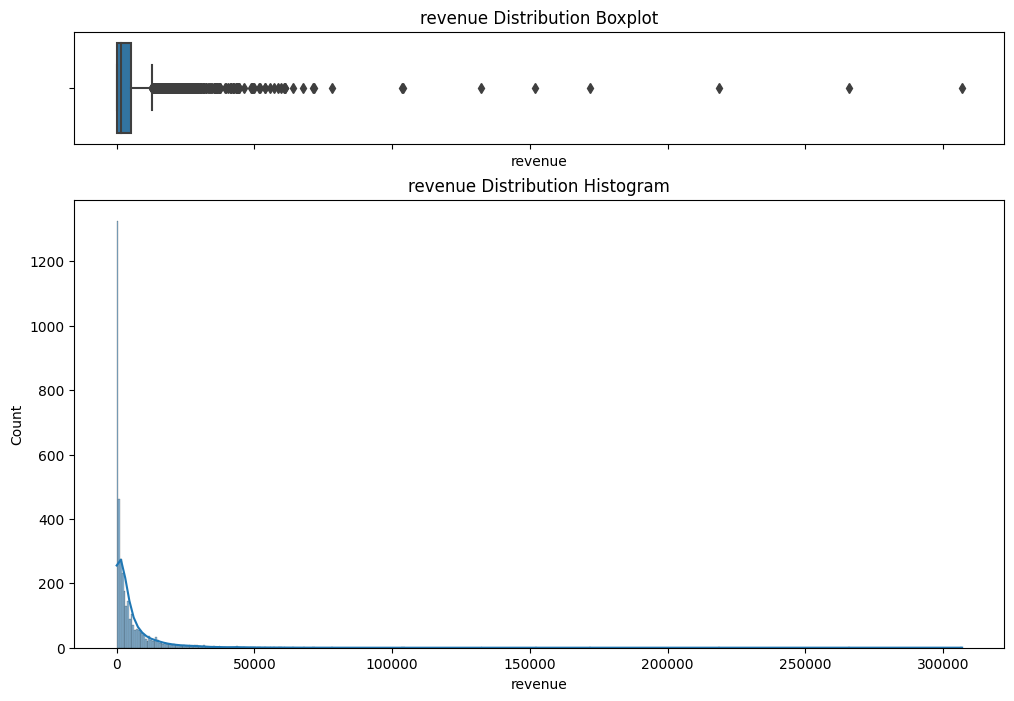

In [198]:
chart_numeric_feature(data, 'revenue')

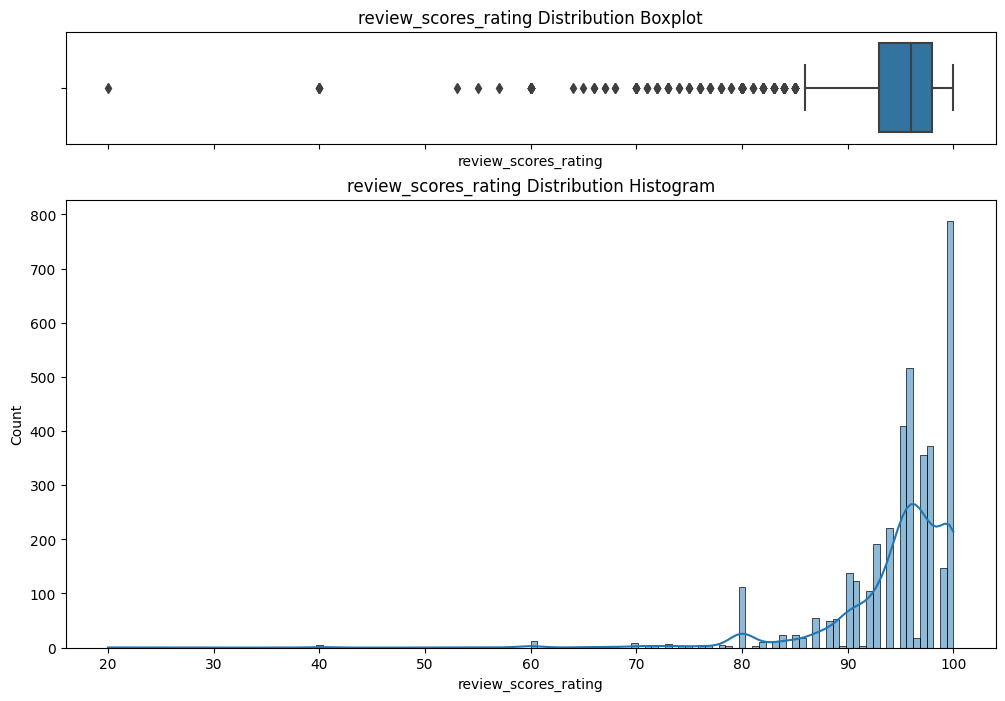

In [199]:
chart_numeric_feature(data, 'review_scores_rating')

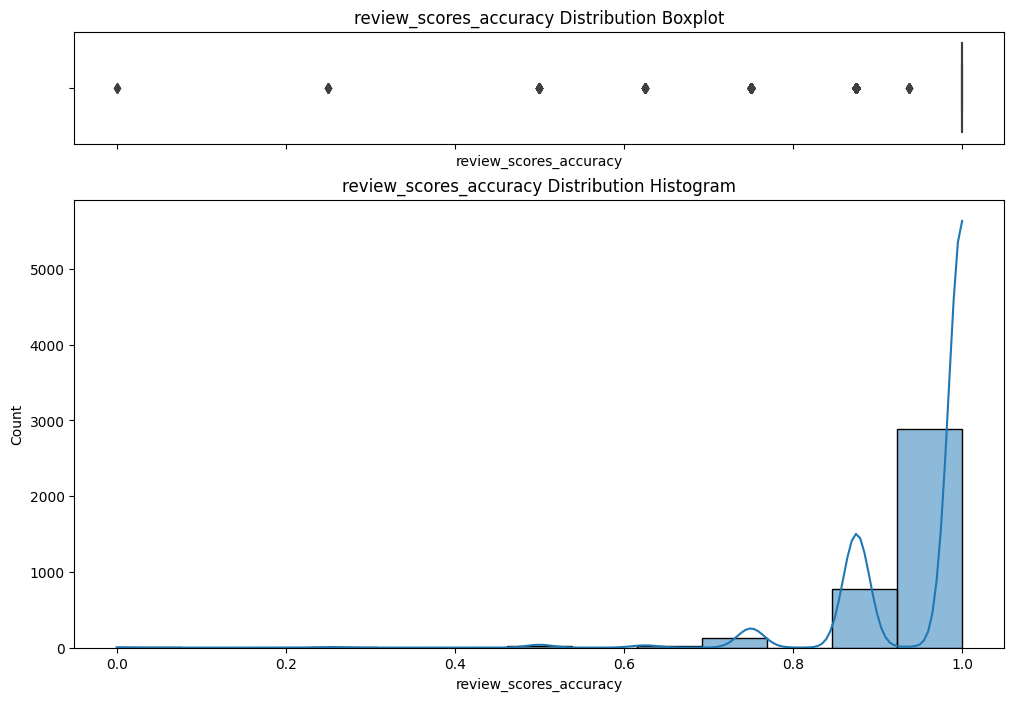

In [200]:
chart_numeric_feature(data, 'review_scores_accuracy')

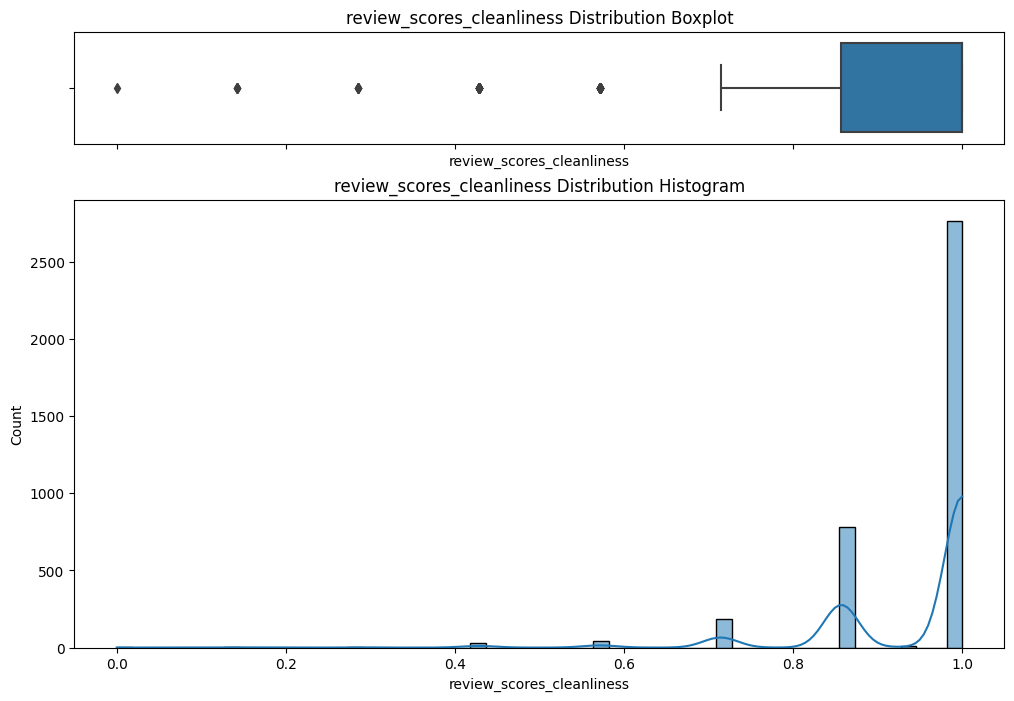

In [201]:
chart_numeric_feature(data, 'review_scores_cleanliness')

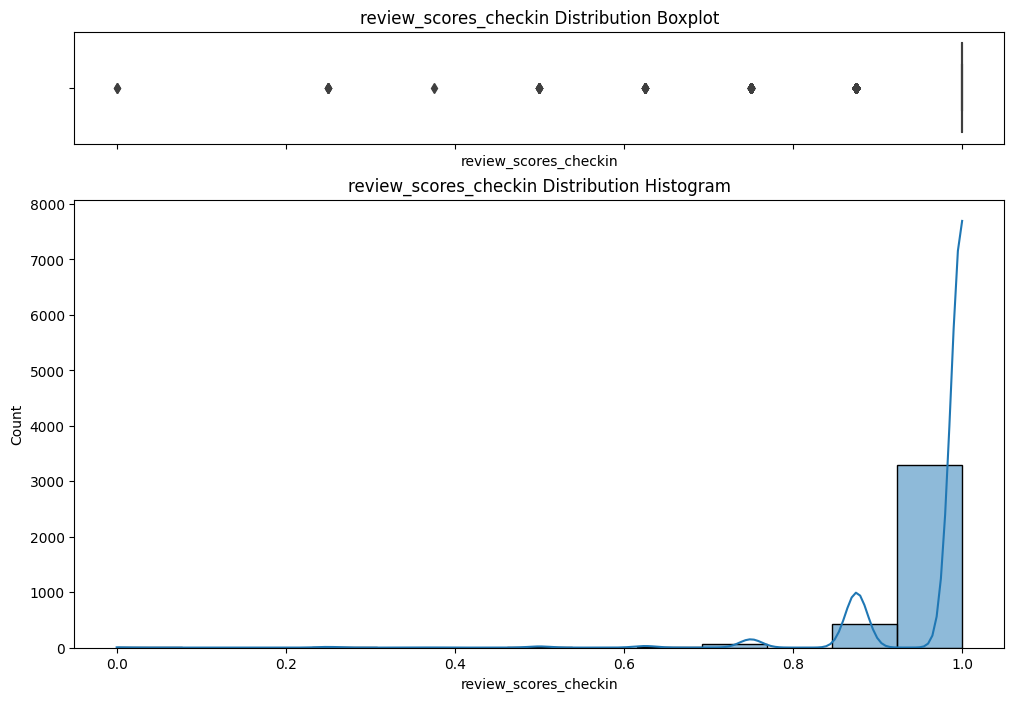

In [202]:
chart_numeric_feature(data, 'review_scores_checkin')

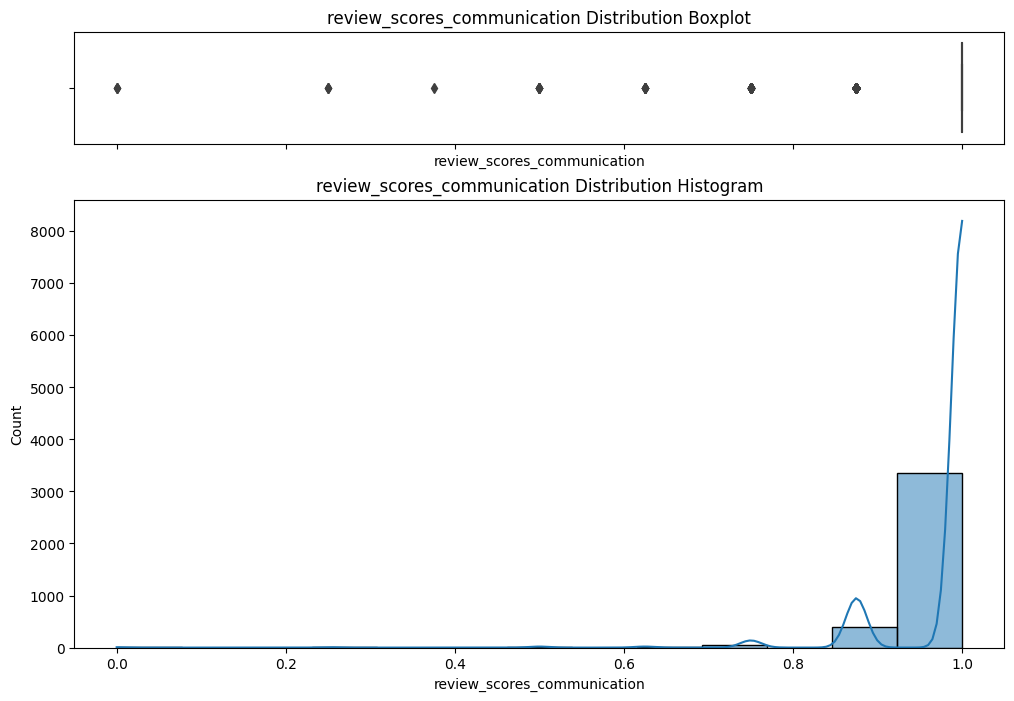

In [203]:
chart_numeric_feature(data, 'review_scores_communication')

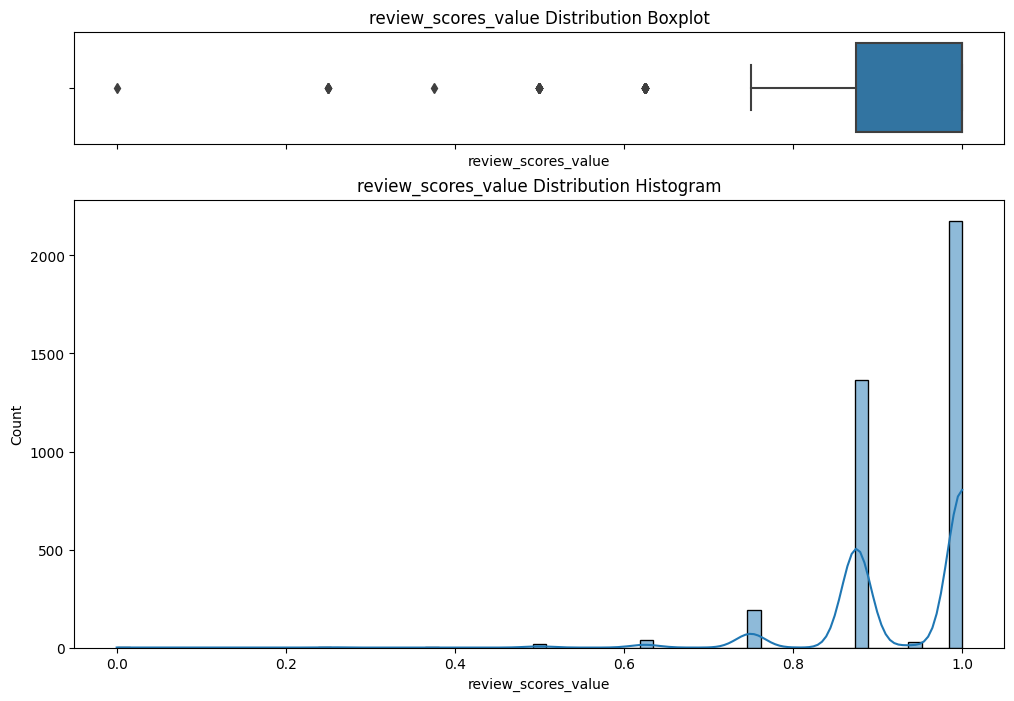

In [204]:
chart_numeric_feature(data, 'review_scores_value')

In [205]:
highest_rated_areas = pd.DataFrame(data['neighbourhood_group_cleansed'].unique(), columns=['area'])
mean_rating = []
mean_revenue = []
mean_latitude = []
mean_longitude = []
for area in highest_rated_areas['area'].unique():
    mean_rating.append(data[data['neighbourhood_group_cleansed'] == area]['review_scores_rating'].mean())
    mean_revenue.append(data[data['neighbourhood_group_cleansed'] == area]['revenue'].mean())
    mean_latitude.append(data[data['neighbourhood_group_cleansed'] == area]['latitude'].mean())
    mean_longitude.append(data[data['neighbourhood_group_cleansed'] == area]['longitude'].mean())
highest_rated_areas['mean_rating'] = mean_rating
highest_rated_areas['mean_revenue'] = mean_revenue
highest_rated_areas['mean_latitude'] = mean_latitude
highest_rated_areas['mean_longitude'] = mean_longitude

In [206]:
highest_rated_areas

,area,mean_rating,mean_revenue,mean_latitude,mean_longitude
0,Queen Anne,95.701695,6038.752542,47.634047,-122.357751
1,Ballard,95.686957,6078.726087,47.674525,-122.380150
2,Other neighborhoods,94.785894,4409.843829,47.670646,-122.335808
3,Cascade,93.730337,4075.134831,47.633757,-122.331631
4,Central Area,96.163957,4636.371274,47.607715,-122.301760
...,...,...,...,...,...
12,Delridge,95.987342,3641.189873,47.545983,-122.362599
13,Seward Park,95.022727,4063.500000,47.554276,-122.268686
14,Northgate,94.912500,2962.362500,47.702454,-122.325100
15,Capitol Hill,94.414462,4951.910053,47.623578,-122.316462


**1. What are the highest rated areas to to reserve accomodations in Seattle?**

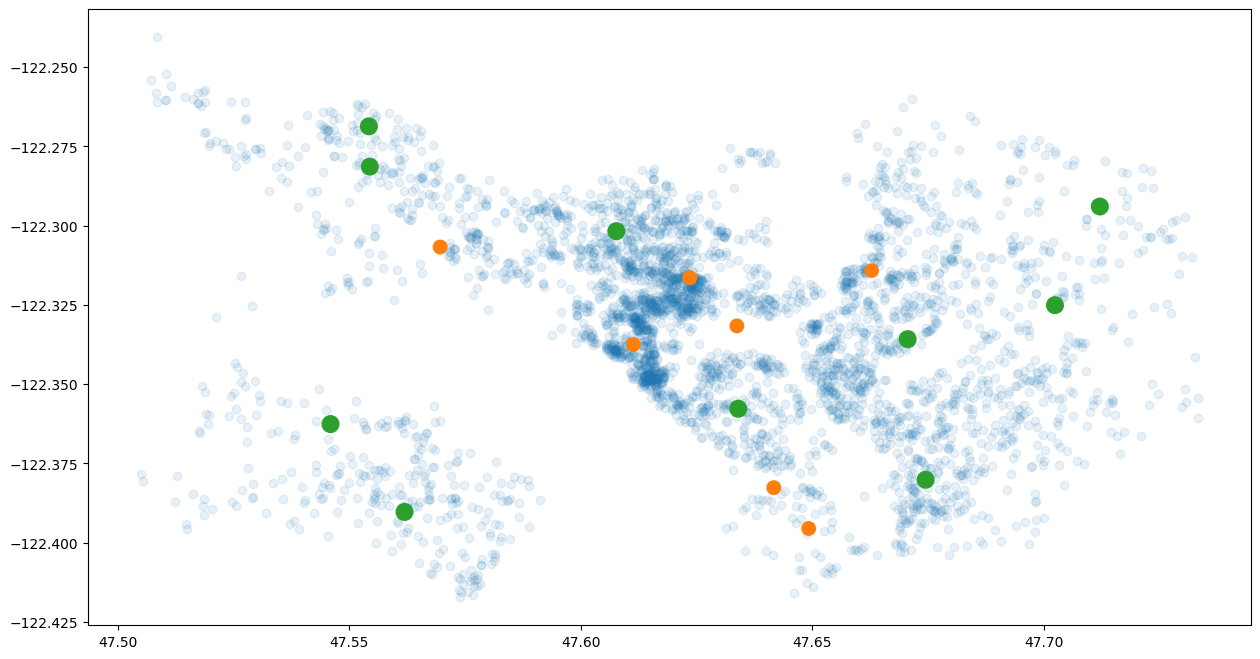

In [207]:
plt.scatter(data['latitude'], data['longitude'], alpha=0.1)
plt.scatter(highest_rated_areas['mean_latitude'], highest_rated_areas['mean_longitude'], highest_rated_areas['mean_rating'])
filtered_areas = highest_rated_areas.sort_values('mean_rating', ascending=False)[0:10]
plt.scatter(filtered_areas['mean_latitude'], filtered_areas['mean_longitude'], filtered_areas['mean_rating'] * 1.5)
plt.rcParams['figure.figsize'] = [15, 8]
plt.show()

In [208]:
display(highest_rated_areas[['area', 'mean_rating']].sort_values('mean_rating', ascending=False)[:10])

,area,mean_rating
4,Central Area,96.163957
8,West Seattle,96.061576
12,Delridge,95.987342
0,Queen Anne,95.701695
1,Ballard,95.686957
13,Seward Park,95.022727
14,Northgate,94.912500
11,Rainier Valley,94.911950
2,Other neighborhoods,94.785894
16,Lake City,94.701493


The Top (10) Highest Rated Neighbourhoods are listed above in descending order.

**2. What are the highest revenue generating neighbourhoods in Seattle?**

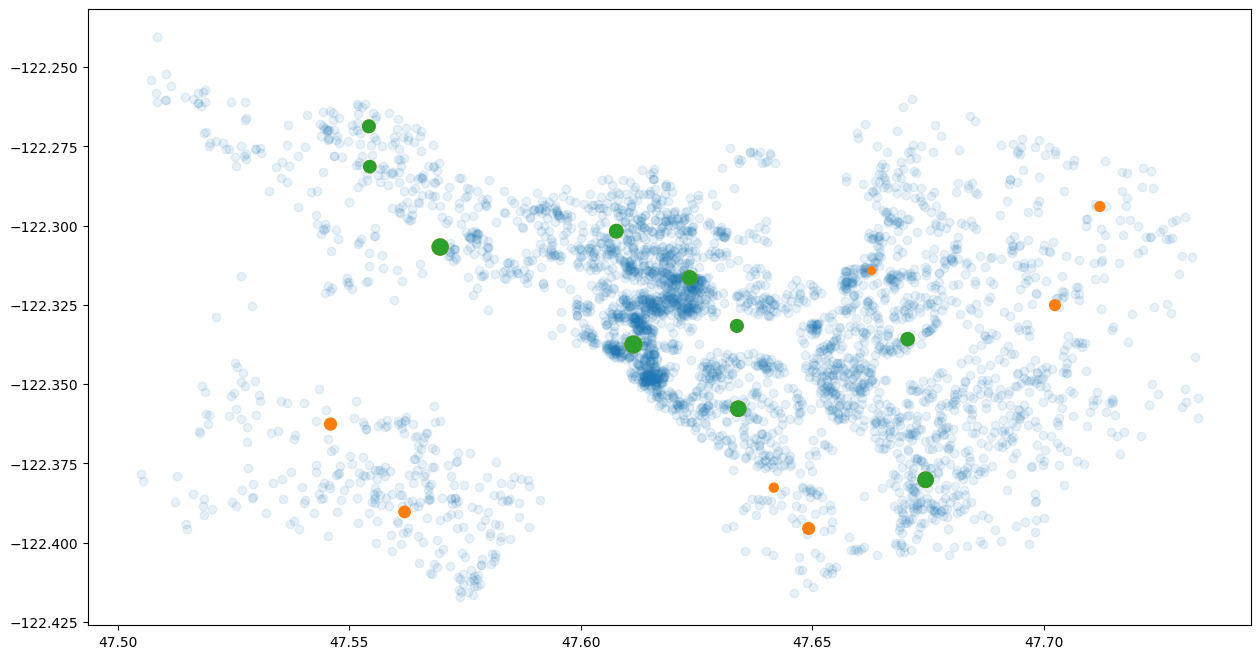

In [209]:
plt.scatter(data['latitude'], data['longitude'], alpha=0.1)
plt.scatter(highest_rated_areas['mean_latitude'], highest_rated_areas['mean_longitude'], highest_rated_areas['mean_revenue'] / 50)
filtered_areas = highest_rated_areas.sort_values('mean_revenue', ascending=False)[0:10]
plt.scatter(filtered_areas['mean_latitude'], filtered_areas['mean_longitude'], filtered_areas['mean_revenue'] / 50)
plt.show()

In [210]:
display(highest_rated_areas[['area', 'mean_revenue']].sort_values('mean_revenue', ascending=False)[:10])

,area,mean_revenue
6,Downtown,7247.666038
10,Beacon Hill,6606.983051
1,Ballard,6078.726087
0,Queen Anne,6038.752542
15,Capitol Hill,4951.910053
4,Central Area,4636.371274
2,Other neighborhoods,4409.843829
3,Cascade,4075.134831
13,Seward Park,4063.500000
11,Rainier Valley,3827.345912


The Top (10) Highest Revenue Earning Neighbourhoods are listed above in descending order.

**5. What are the most widely provided amenities listed by hosts in Seattle?**

In [211]:
amenities['count'] = 0
i = 0
for idx in amenity_types:
    amenities['count'].iloc[i] = amenity['amenity_{}'.format(idx)].sum()
    i += 1

/tmp/ipykernel_6390/3849534746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['count'].iloc[i] = amenity['amenity_{}'.format(idx)].sum()


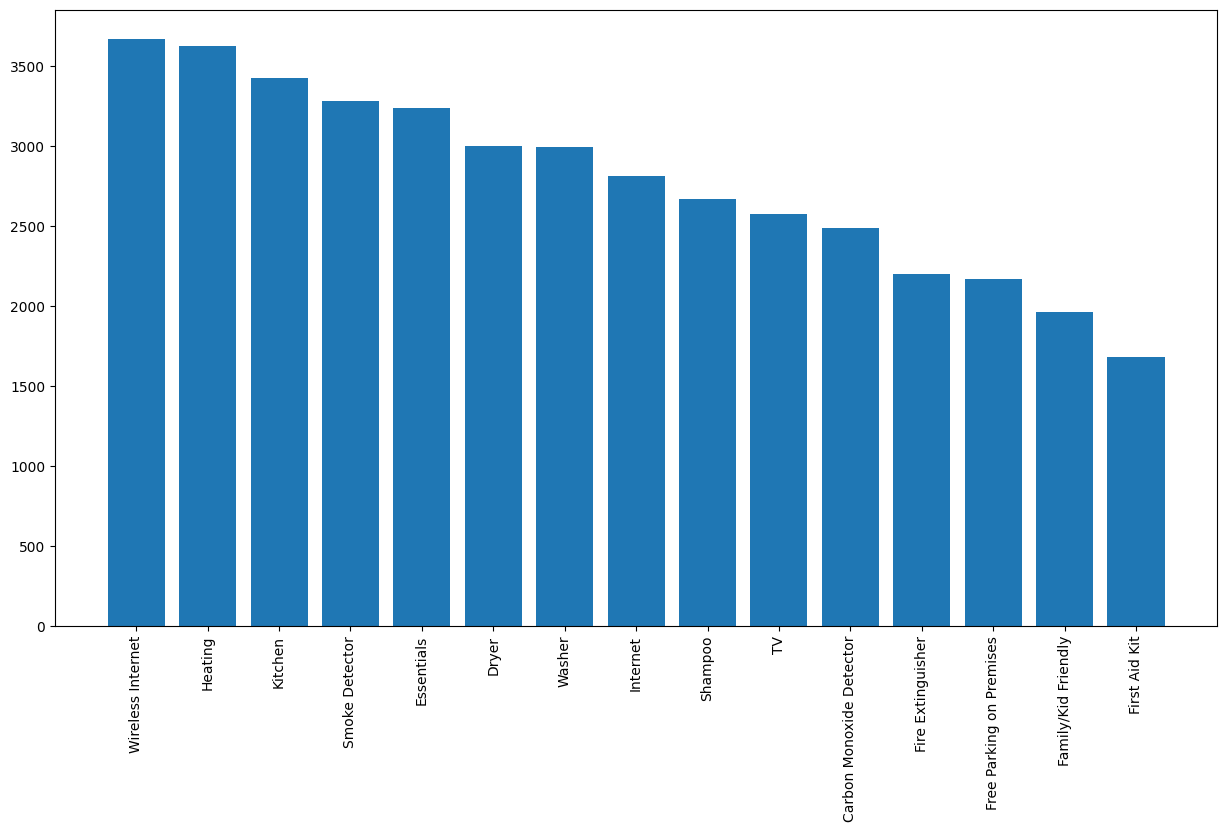

In [212]:
plt.bar(amenities.sort_values('count', ascending=False)[:15]['amenity'], amenities.sort_values('count', ascending=False)[:15]['count'])
plt.xticks(rotation=90)
plt.show()

The Top (15) Most Provided Amenities are listed above in descending order. The assumption is certain amenities are required by law, meanwhile others are additional amenities which are non-essential but potentially attractive to guests.

**Linear Regression**

As we are focusing on Linear Regression with business questions seeking inference over prediction. I will use a split of observations to ensure much explanatory power can be gleaned from our list of features to determine feature importance. I will extract the coefficients (beta parameters) from our linear regression for light interpretation and to understand the magnitude and direction of impact on our target. 

Statistical significance could have been gleaned had I written additional functions which calculate P-values, since *scikit-learn* is not specialised for non-predictive modelling. However, for the purpose of this project, I have limited myself to purely observation of coefficients in answering business questions of interest.

In [213]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [214]:
def display_results(y_true, y_pred):
    rsq = metrics.r2_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)

    print('R-Sq: ', round(rsq, 4))
    print('MAE: ', round(mae, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))

**3. Which scores are most important to overall ratings?**

<AxesSubplot:>

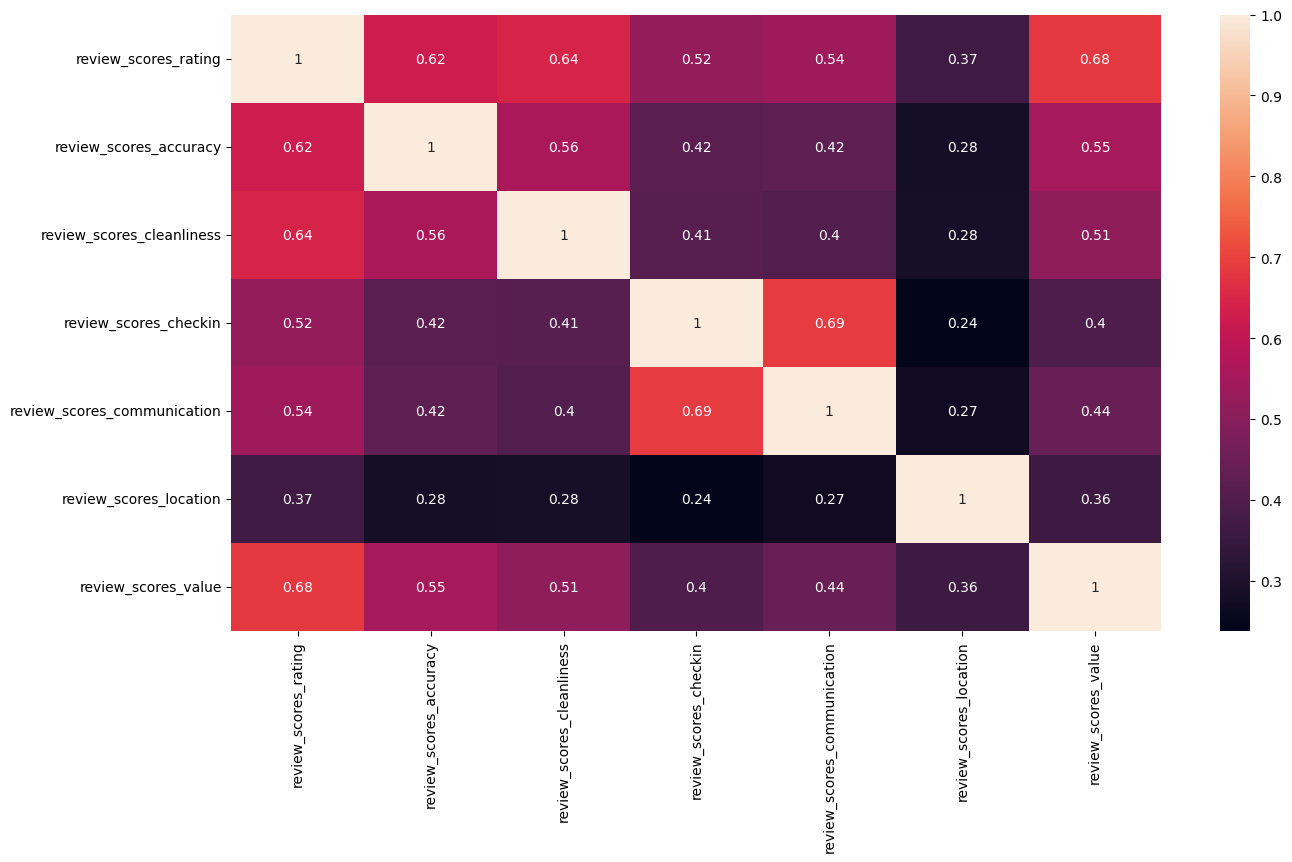

In [215]:
sns.heatmap(data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr(), annot=True)

In [216]:
pd.DataFrame(data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr()[1:4]['review_scores_rating'])

,review_scores_rating
review_scores_accuracy,0.622603
review_scores_cleanliness,0.643828
review_scores_checkin,0.522128


Positive review ratings are positively correlated with accurate listing descriptions, degree of cleanliness, and check-in experience.

In [217]:
model = LinearRegression()

In [218]:
x = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(data[x], data['review_scores_rating'], test_size = 0.2, random_state=42)

In [220]:
model.fit(X_train, y_train)

LinearRegression()

In [221]:
display_results(y_test, model.predict(X_test))

R-Sq:  0.5676
MAE:  2.303
MSE:  13.6031
RMSE:  3.6882


[...] It appears that conducting a regression on the full dataset indicates that component review scores explain 65.08% of overall review rating in this linear regression model. We are presently not considering P-values to find whether regressors are statistically significant, but merely observing the model coefficients to determine degree of impact of regressor upon the overall rating.

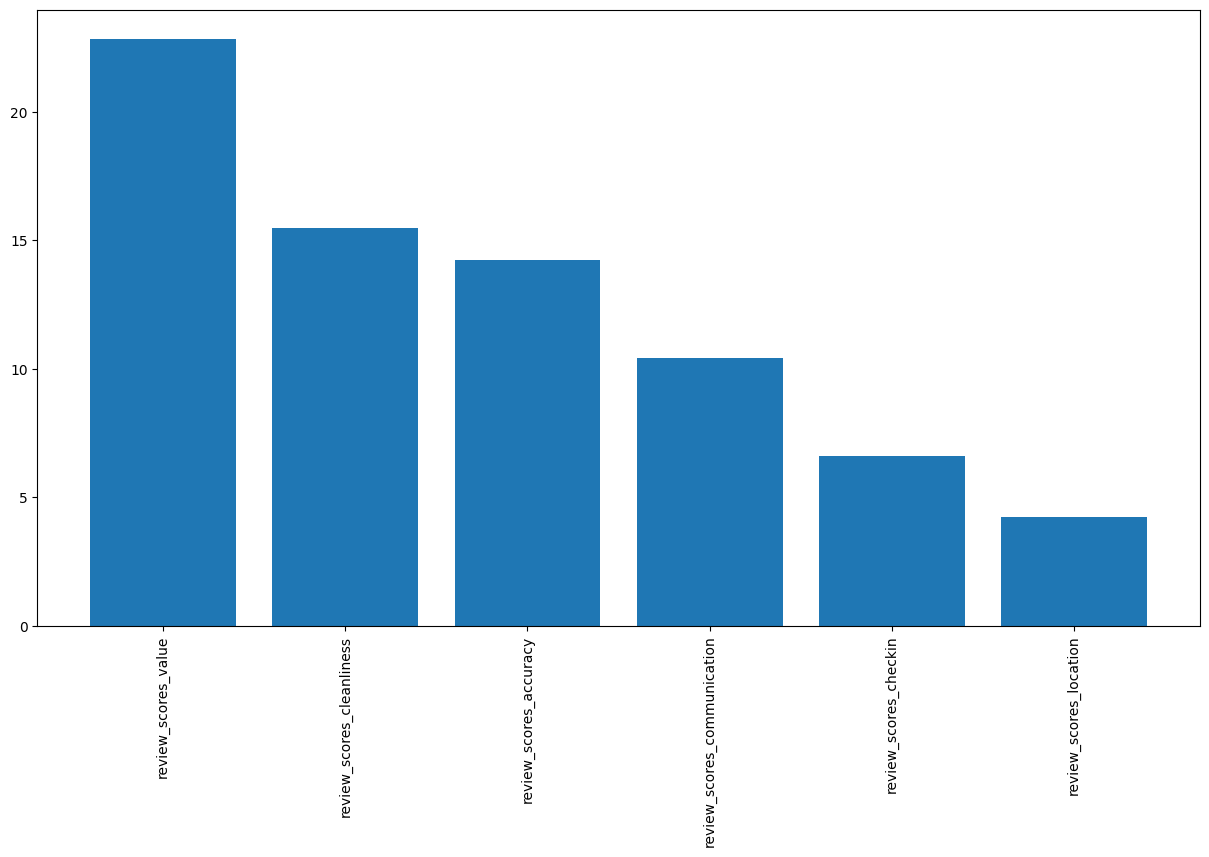

In [222]:
coefficients = pd.DataFrame(x, columns=['regressor'])
coefficients['coefficient'] = model.coef_
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

The Top (3) review factors which impact overall rating for a host are:
1. Value
2. Cleanliness
3. Accuracy

This implies that guests put increased weight on the value for money of their stay, the cleanliness of the accomodations provided by the host, and the degree to which the host's description of their accomodations accurately match the provided description when determining their overall score for a stay.

This differs from the correlation matrix indicating that checkin experience was the third most correlated contributor to the overall rating, but otherwise relatively matches 2/3 contributors except in order of correlation to coefficient impact.

**4. Do hosts with higher ratings overall earn higher revenue?**

<AxesSubplot:>

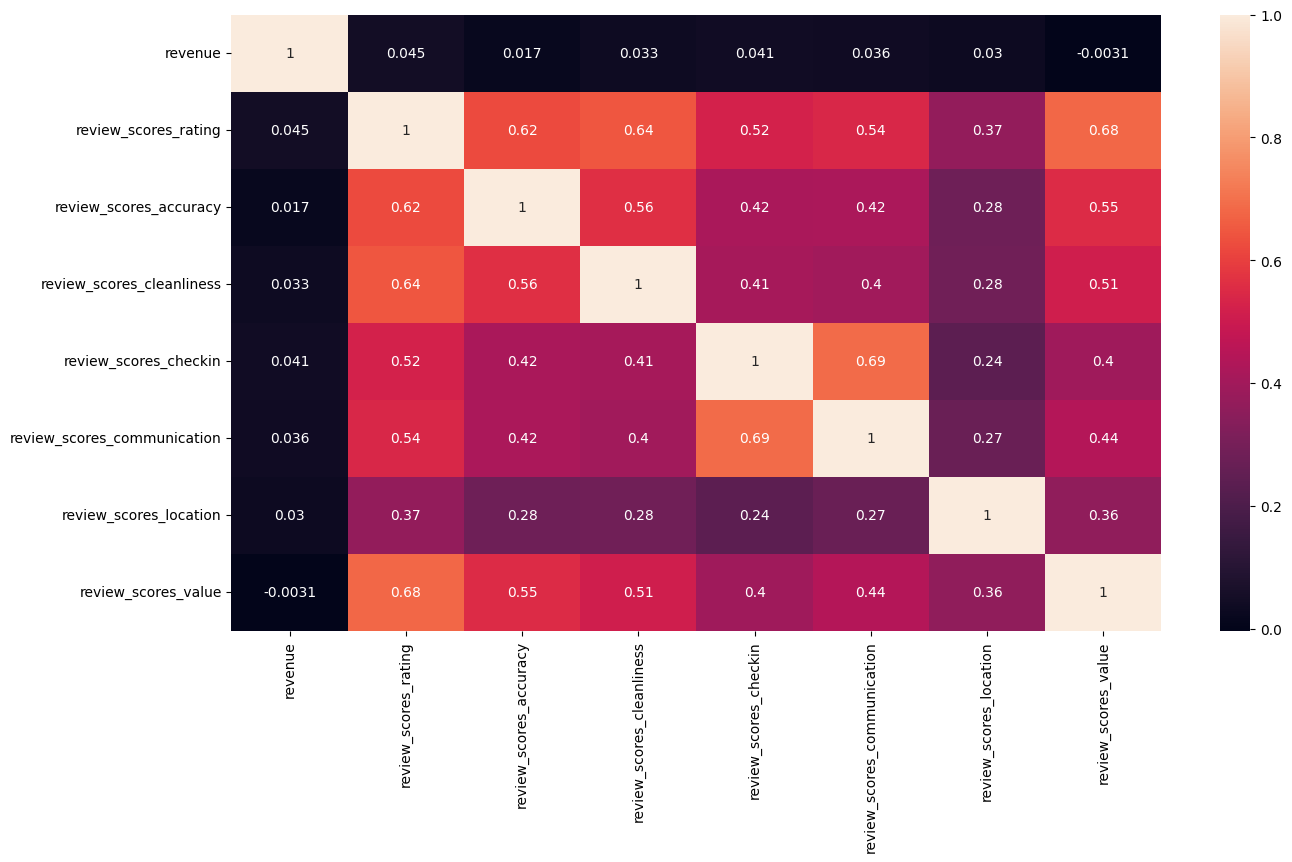

In [223]:
sns.heatmap(data[['revenue', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr(), annot=True)

There appears to be virtually no correlation between revenue and the composite rating / component ratings of the hosts.

In [224]:
model = LinearRegression()

In [225]:
x = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(data[x], data['revenue'], test_size=0.2, random_state=42)

In [227]:
model.fit(X_train, y_train)

LinearRegression()

In [228]:
display_results(y_test, model.predict(X_test))

R-Sq:  0.0011
MAE:  5820.0245
MSE:  257155199.4667
RMSE:  16036.0593


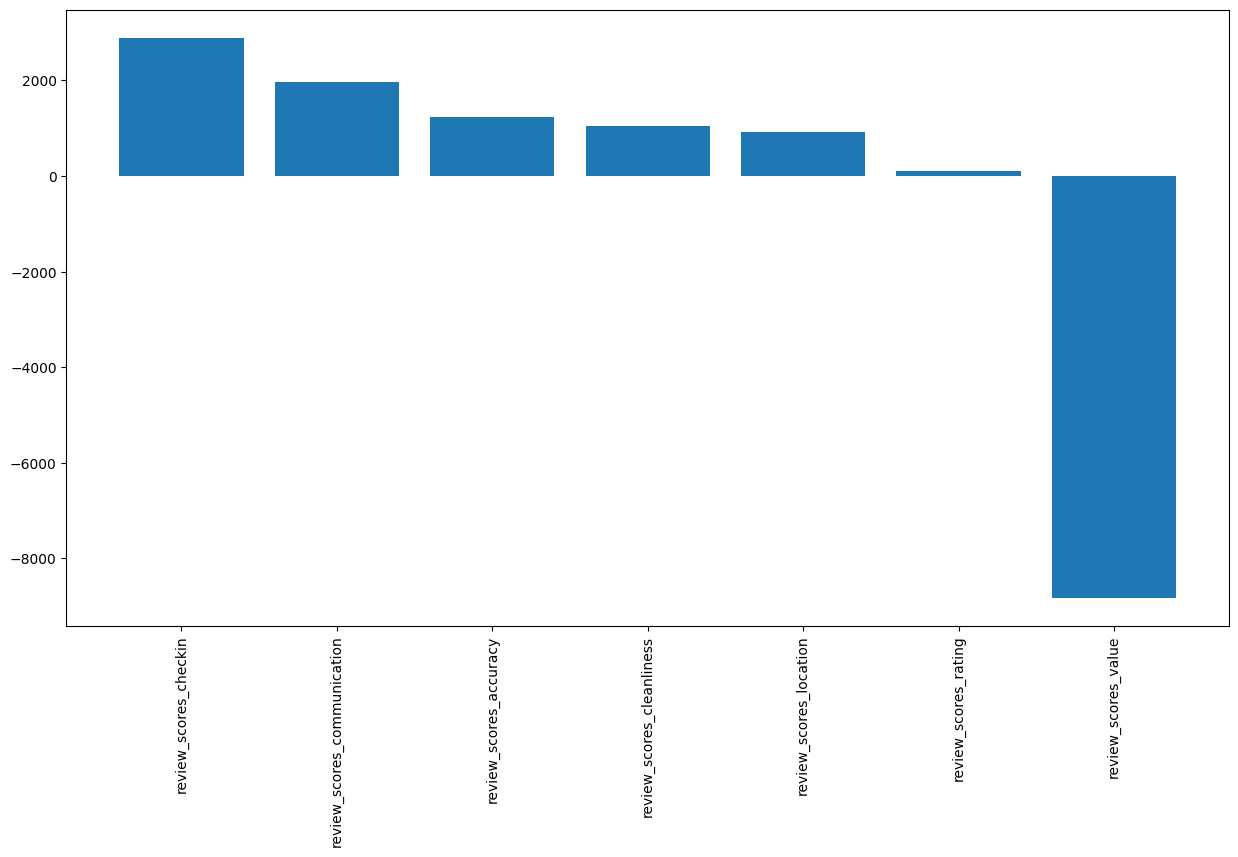

In [229]:
coefficients = pd.DataFrame(x, columns=['regressor'])
coefficients['coefficient'] = model.coef_
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

[...] At first, it appears that listings with high value for money ratings are largely associated with the most negative impact on estimated revenues earned. Positive ratings for checkin, location, communicativeness of the host, and cleanliness are all positively associated with estimated revenues earned. Overall ratings is positively associated with the lowest estimated revenues earned. Listings where hosts provided great value and listed accurate descriptions were associated with negative impact to estimated revenues.

However, given poor explanatory power (0.53% of target explained by features), incredibly high error in our residuals, and potentially statistically insignificant coefficients, it would be inappropriate to interpret any explanatory effect of review ratings on revenue.

**6. Which amenities, housing characteristics, and factors contribute positively to revenue?**

In [230]:
target_revenue = pd.DataFrame(data['revenue'])
target_rating = pd.DataFrame(data['review_scores_rating'])

In [231]:
X.drop(['listing_id', 'nbdg_Other neighborhoods', 'property_Other', 'room_Shared room', 'cancel_flexible'], axis=1, inplace=True)

GLMs require dropping a single categorical (one-hot encoded) column within each set to prevent perfect collinearity.

In [232]:
model = LinearRegression()

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, target_revenue, test_size=0.2, random_state=42)

In [234]:
model.fit(X_train, y_train)

LinearRegression()

In [235]:
display_results(y_test, model.predict(X_test))

R-Sq:  0.2334
MAE:  3828.2114
MSE:  197344926.1275
RMSE:  14047.951


[...] It appears that conducting a regression on the full dataset indicates that the listed regressors explain 34.51% of overall estimated revenue in this linear regression model. We are presently not considering P-values to find whether regressors are statistically significant, but merely observing the model coefficients to determine degree of impact of regressor upon the overall rating.

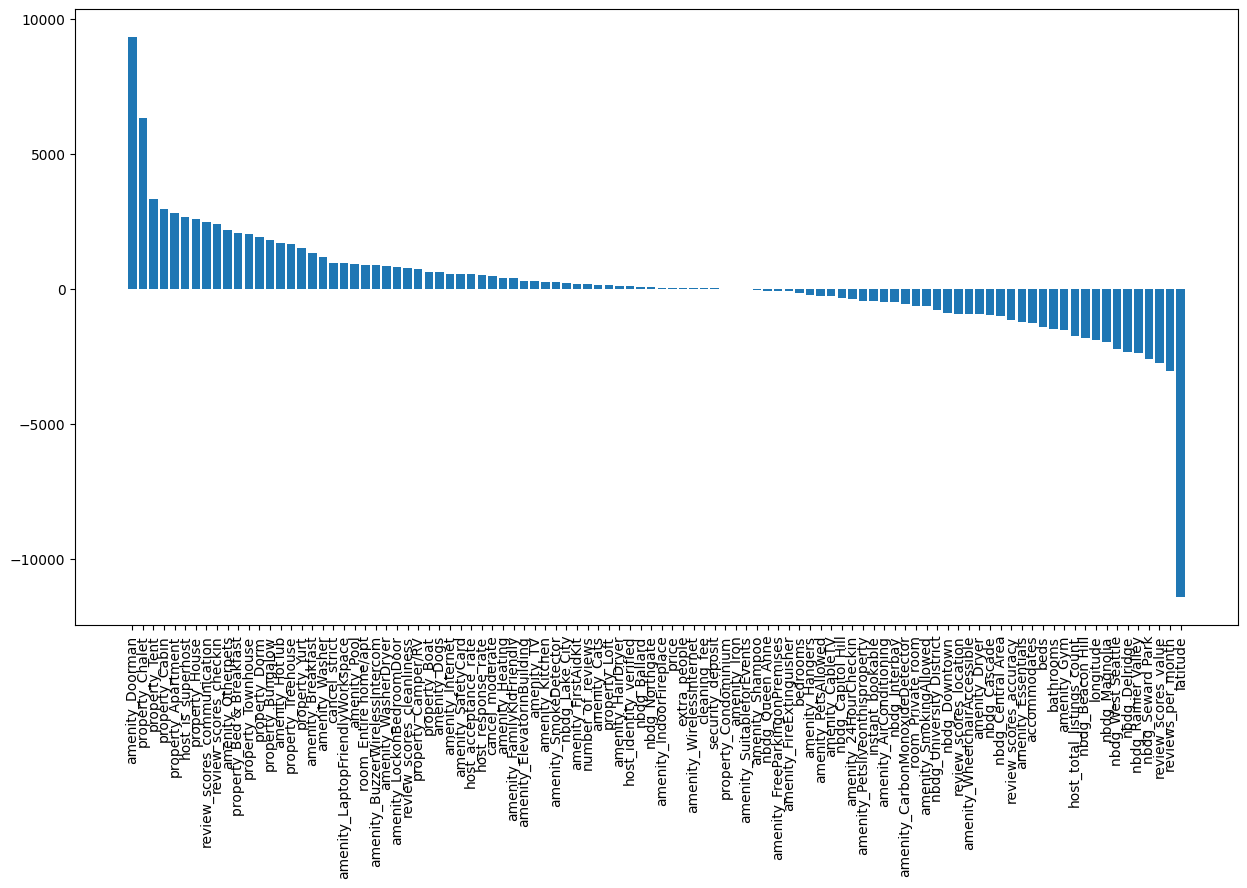

In [236]:
coefficients = pd.DataFrame(X.columns.to_list(), columns=['regressor'])
coefficients['coefficient'] = model.coef_.T
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

In [237]:
pd.set_option('display.max_rows', None)
display(coefficients.sort_values('coefficient', ascending=False)[:25])
pd.set_option('display.max_rows', 10)

,regressor,coefficient
39,amenity_Doorman,9310.589973
63,property_Chalet,6316.875819
68,property_Tent,3331.438055
61,property_Cabin,2952.686021
57,property_Apartment,2792.027575
97,host_is_superhost,2654.337860
66,property_House,2579.150045
86,review_scores_communication,2448.709818
85,review_scores_checkin,2398.073182
38,amenity_Otherpets,2182.835495


[Property]
Chalet
Dormitory
House
Bed & Breakfast
Apartment
Tent
Townhouse
Treehouse
Bungalow
Cabin

[Room]
Room - Entire Home/Apartment

[Housing]
Bedrooms

[Amenity]
Doorman
Other Pets
Washer & Dryer
Washer
Hot Tub
Lock on Bedroom Door
Buzzer / Wireless Intercom

39	amenity_Doorman	7829.697279
38	amenity_Otherpets	1794.871720
40	amenity_WasherDryer	1338.931905
8	amenity_Washer	1264.009082
22	amenity_HotTub	1168.968646
33	amenity_LockonBedroomDoor	1095.034861
11	amenity_BuzzerWirelessIntercom	1075.547959

[Scores]
85	review_scores_checkin	2133.399998
87	review_scores_location	1763.873359
86	review_scores_communication	1529.722744
84	review_scores_cleanliness	1282.609608

[Host]
97	host_is_superhost	2798.686631

[Location]
Beacon Hill
42	nbdg_Beacon Hill	1824.735532

**7. Which amenities, housing characteristics, and factors contribute positively to ratings?**

In [238]:
model = LinearRegression()

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, target_rating, test_size=0.2, random_state=42)

In [240]:
model.fit(X_train, y_train)

LinearRegression()

In [241]:
display_results(y_test, model.predict(X_test))

R-Sq:  0.5624
MAE:  2.2955
MSE:  13.766
RMSE:  3.7103


It appears that conducting a regression on the full dataset indicates that the listed regressors explain 66.76% of overall estimated revenue in this linear regression model. We are presently not considering P-values to find whether regressors are statistically significant, but merely observing the model coefficients to determine degree of impact of regressor upon the overall rating.

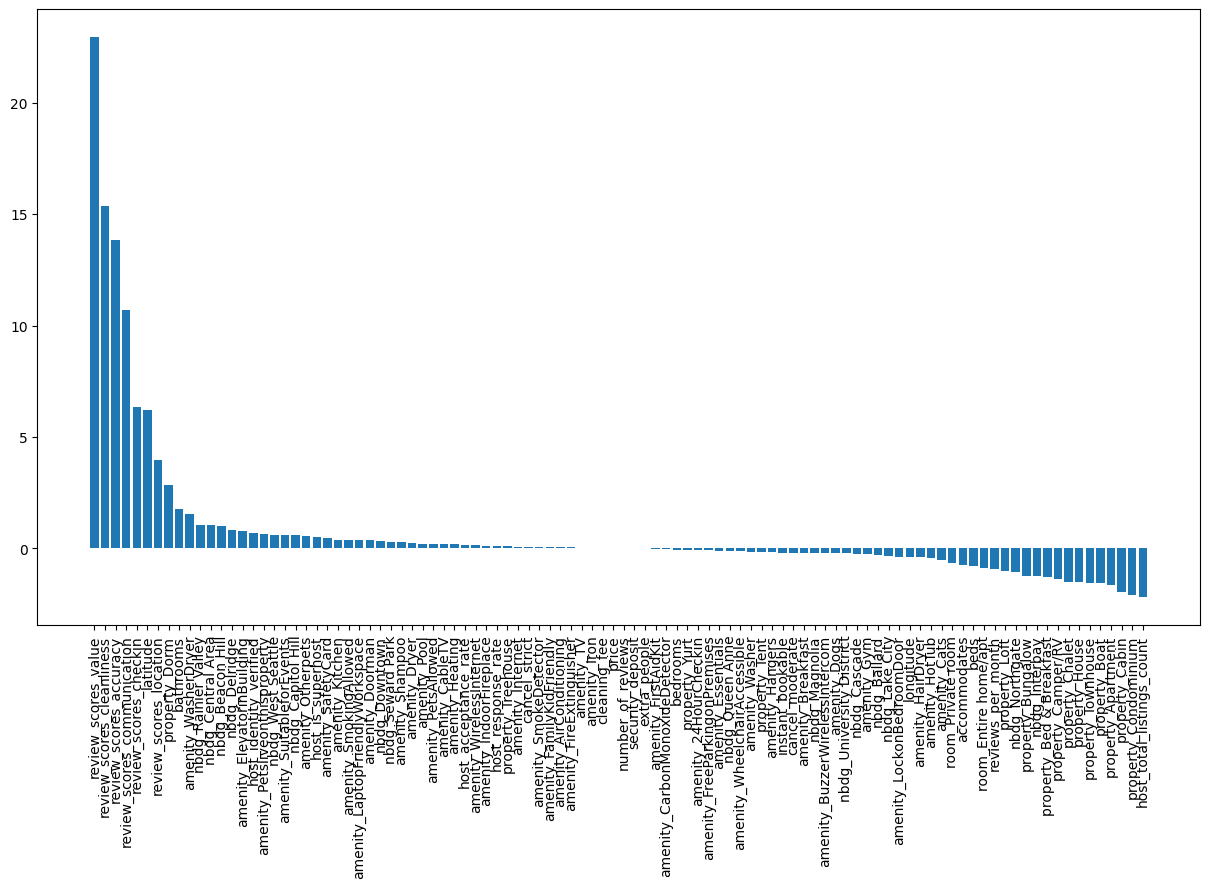

In [242]:
coefficients = pd.DataFrame(X.columns.to_list(), columns=['regressor'])
coefficients['coefficient'] = model.coef_.T
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

In [243]:
pd.set_option('display.max_rows', None)
display(coefficients.sort_values('coefficient', ascending=False)[:25])
pd.set_option('display.max_rows', 10)

,regressor,coefficient
88,review_scores_value,22.941172
84,review_scores_cleanliness,15.364727
83,review_scores_accuracy,13.827552
86,review_scores_communication,10.693238
85,review_scores_checkin,6.345991
90,latitude,6.190296
87,review_scores_location,3.978797
65,property_Dorm,2.835734
80,bathrooms,1.774559
40,amenity_WasherDryer,1.523699


___